# 0. Load Data

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Data_y_hoc.csv')

In [5]:
df.head()

,Case,Age,Gender,Tgian_dieu_tri,EEG,MRI,Chi_diem_viem,Dot_bien_ve_gen,CSF Antibodies detection,DEE,CSF Pathogen,Temporal Lobe Seizures,Extra-Limbic Involvement,Cham_phat_trien,Diagnosis_y,Treatment_y,Success_rate_y
0,1,8.0,F,11.0,Extreme delta brush (EDB),NaN,NaN,NaN,NMDAR,NaN,ND,Present,No,NaN,Viem_nao_tu_mien_AE,"IV immunoglobulin, corticosteroids, plasmapher...",2
1,2,12.0,M,15.0,Frontal slow wave preceding FBDS,NaN,"Elevated erythrocyte sedimentation rate, prese...",NaN,LGI1,NaN,ND,Present,Yes,NaN,Viem_nao_tu_mien_AE,"Anti-epileptic drugs (AEDs), immunomodulatory ...",4
2,3,7.0,F,12.0,ND,NaN,NaN,NaN,GAD,NaN,ND,Present,No,NaN,Viem_nao_tu_mien_AE,AEDs,1
3,4,10.0,M,15.0,Generalized rhythmic delta activity (GRDA),NaN,"Increased levels of interleukin-8, matrix meta...",CNTNAP2,CASPR2,NaN,ND,Absent,Yes,NaN,Viem_nao_tu_mien_AE,"IV immunoglobulin, corticosteroids",4
4,5,12.0,M,14.0,Extreme delta brush (EDB),NaN,"Increased levels of interleukin-6, C-reactive ...",NaN,NMDAR,NaN,ND,Present,No,NaN,Viem_nao_tu_mien_AE,"IV immunoglobulin, corticosteroids, plasmapher...",1


# 1. Preprocess data
Operations: fillna, replace cells, one-hot encode

In [6]:
cols = df.columns

In [7]:
cols

Index(['Case', 'Age', 'Gender', 'Tgian_dieu_tri', 'EEG', 'MRI',
       'Chi_diem_viem', 'Dot_bien_ve_gen', 'CSF Antibodies detection', 'DEE',
       'CSF Pathogen', 'Temporal Lobe Seizures', 'Extra-Limbic Involvement',
       'Cham_phat_trien', 'Diagnosis_y', 'Treatment_y', 'Success_rate_y'],
      dtype='object')

In [8]:
df["Tgian_dieu_tri"].fillna(int(0), inplace = True)
df["EEG"].fillna("N/A", inplace = True)
df["MRI"].fillna("N/A", inplace = True)
df["Chi_diem_viem"           ].fillna("N/A", inplace = True)
df["Dot_bien_ve_gen"         ].fillna("N/A", inplace = True)
df["CSF Antibodies detection"].fillna("N/A", inplace = True)
df["DEE"         ].fillna("None", inplace = True)
df["CSF Pathogen"].fillna("N/A", inplace = True)
df["Extra-Limbic Involvement"].fillna(False, inplace = True)
df["Temporal Lobe Seizures"].fillna(True, inplace = True)
df["CSF Pathogen"].fillna("N/A", inplace = True)
df["Cham_phat_trien"].fillna("N/A", inplace = True)
df["Treatment_y"].fillna("N/A", inplace = True)



In [9]:
# convert 'age', 'thoi_gian_dieu_tri' float -> int
df['Age'] = df['Age'].astype(int)
df['Tgian_dieu_tri'] = df['Tgian_dieu_tri'].astype(int)


In [10]:
df.replace(['Yes', 'yes', 'Present'], True, inplace=True)
df.replace(['No', 'no', 'Absent'], False, inplace=True)
df.replace('Elevated levels of tumor necrosis factor-alpha, interleukin-1β', 
           'Elevated levels of tumor necrosis factor-alpha, interleukin-1beta', inplace=True)


In [11]:
unique_values = {}
for col in cols:
    unique_values[col] = df[col].unique().tolist()
# unique_values


In [12]:
import json
with open('column_unique_values.json', 'w') as f:
    json.dump(unique_values, f)

### One-hot encoding

In [13]:
df.head(20)

,Case,Age,Gender,Tgian_dieu_tri,EEG,MRI,Chi_diem_viem,Dot_bien_ve_gen,CSF Antibodies detection,DEE,CSF Pathogen,Temporal Lobe Seizures,Extra-Limbic Involvement,Cham_phat_trien,Diagnosis_y,Treatment_y,Success_rate_y
0,1,8,F,11,Extreme delta brush (EDB),N/A,N/A,N/A,NMDAR,None,ND,True,False,N/A,Viem_nao_tu_mien_AE,"IV immunoglobulin, corticosteroids, plasmapher...",2
1,2,12,M,15,Frontal slow wave preceding FBDS,N/A,"Elevated erythrocyte sedimentation rate, prese...",N/A,LGI1,None,ND,True,True,N/A,Viem_nao_tu_mien_AE,"Anti-epileptic drugs (AEDs), immunomodulatory ...",4
2,3,7,F,12,ND,N/A,N/A,N/A,GAD,None,ND,True,False,N/A,Viem_nao_tu_mien_AE,AEDs,1
3,4,10,M,15,Generalized rhythmic delta activity (GRDA),N/A,"Increased levels of interleukin-8, matrix meta...",CNTNAP2,CASPR2,None,ND,False,True,N/A,Viem_nao_tu_mien_AE,"IV immunoglobulin, corticosteroids",4
4,5,12,M,14,Extreme delta brush (EDB),N/A,"Increased levels of interleukin-6, C-reactive ...",N/A,NMDAR,None,ND,True,False,N/A,Viem_nao_tu_mien_AE,"IV immunoglobulin, corticosteroids, plasmapher...",1
5,6,12,F,11,Extreme delta brush (EDB),N/A,N/A,N/A,NMDAR,None,ND,True,False,N/A,Viem_nao_tu_mien_AE,"IV immunoglobulin, corticosteroids, plasmapher...",2
6,7,13,M,13,Extreme delta brush (EDB),N/A,"Increased levels of interleukin-8, matrix meta...",N/A,NMDAR,None,ND,True,False,N/A,Viem_nao_tu_mien_AE,"IV immunoglobulin, corticosteroids, plasmapher...",3
7,8,14,M,12,Extreme delta brush (EDB),N/A,N/A,N/A,NMDAR,None,ND,True,False,N/A,Viem_nao_tu_mien_AE,"IV immunoglobulin, corticosteroids, plasmapher...",2
8,9,15,F,17,Extreme delta brush (EDB),N/A,"Increased levels of interleukin-6, C-reactive ...",N/A,NMDAR,None,ND,True,True,N/A,Viem_nao_tu_mien_AE,"IV immunoglobulin, corticosteroids, plasmapher...",3
9,10,11,F,9,Extreme delta brush (EDB),N/A,N/A,N/A,NMDAR,None,ND,True,False,N/A,Viem_nao_tu_mien_AE,"IV immunoglobulin, corticosteroids, plasmapher...",2


In [14]:
# Process categorical outcome columns (notice the '_y' in column name)

diagnosis_values = ['Viem_nao_tu_mien_AE', 
                    'Viem_nao_nhiem_trung_IE',
                    'Dong_kinh_va_benh_nao_phat_trien_DEE']

treatment_values = [ "IV immunoglobulin, corticosteroids, plasmapheresis",
                                                "Anti-epileptic drugs (AEDs), immunomodulatory therapy",
                                                "AEDs",
                                                "IV immunoglobulin, corticosteroids",
                                                "Antiviral medication",
                                                "Supportive care",
                                                "Antibiotics",
                                                "N/A"]
df['Diagnosis_y'] = df['Diagnosis_y'].replace(diagnosis_values, [0, 1, 2])
df['Treatment_y'] = df['Treatment_y'].replace(treatment_values,
                                                [0, 1, 2, 3, 4, 5, 6, 7])
df.head()                            


,Case,Age,Gender,Tgian_dieu_tri,EEG,MRI,Chi_diem_viem,Dot_bien_ve_gen,CSF Antibodies detection,DEE,CSF Pathogen,Temporal Lobe Seizures,Extra-Limbic Involvement,Cham_phat_trien,Diagnosis_y,Treatment_y,Success_rate_y
0,1,8,F,11,Extreme delta brush (EDB),N/A,N/A,N/A,NMDAR,None,ND,True,False,N/A,0,0,2
1,2,12,M,15,Frontal slow wave preceding FBDS,N/A,"Elevated erythrocyte sedimentation rate, prese...",N/A,LGI1,None,ND,True,True,N/A,0,1,4
2,3,7,F,12,ND,N/A,N/A,N/A,GAD,None,ND,True,False,N/A,0,2,1
3,4,10,M,15,Generalized rhythmic delta activity (GRDA),N/A,"Increased levels of interleukin-8, matrix meta...",CNTNAP2,CASPR2,None,ND,False,True,N/A,0,3,4
4,5,12,M,14,Extreme delta brush (EDB),N/A,"Increased levels of interleukin-6, C-reactive ...",N/A,NMDAR,None,ND,True,False,N/A,0,0,1


In [15]:
cols_numerical_binary = ['Case', 'Age', 'Tgian_dieu_tri', 'Temporal Lobe Seizures', 'Extra-Limbic Involvement', 'Success_rate_y']
cols_y = ['Diagnosis_y', 'Treatment_y', 'Success_rate_y'] # to avoid applying one-hot
cols_categoricals = [col for col in df.columns if col not in cols_numerical_binary and col not in cols_y] # apply one-hot on these
cols_categoricals

['Gender',
 'EEG',
 'MRI',
 'Chi_diem_viem',
 'Dot_bien_ve_gen',
 'CSF Antibodies detection',
 'DEE',
 'CSF Pathogen',
 'Cham_phat_trien']

In [16]:
df_onehot = pd.get_dummies(df, columns = cols_categoricals)
df_onehot.head()


,Case,Age,Tgian_dieu_tri,Temporal Lobe Seizures,Extra-Limbic Involvement,Diagnosis_y,Treatment_y,Success_rate_y,Gender_F,Gender_M,...,CSF Pathogen_ND,CSF Pathogen_S. epidermidis,CSF Pathogen_Saccharomyces,CSF Pathogen_TB,Cham_phat_trien_Cognitive,Cham_phat_trien_Language and Motor,Cham_phat_trien_Motor,Cham_phat_trien_Motor and Social,Cham_phat_trien_N/A,Cham_phat_trien_Unknown
0,1,8,11,True,False,0,0,2,True,False,...,True,False,False,False,False,False,False,False,True,False
1,2,12,15,True,True,0,1,4,False,True,...,True,False,False,False,False,False,False,False,True,False
2,3,7,12,True,False,0,2,1,True,False,...,True,False,False,False,False,False,False,False,True,False
3,4,10,15,False,True,0,3,4,False,True,...,True,False,False,False,False,False,False,False,True,False
4,5,12,14,True,False,0,0,1,False,True,...,True,False,False,False,False,False,False,False,True,False


In [17]:
# We should not pass the id columne (i.e. 'Case') to the ML model
df_onehot.drop(['Case'], axis=1, inplace=True)


In [18]:
df_onehot.head()

,Age,Tgian_dieu_tri,Temporal Lobe Seizures,Extra-Limbic Involvement,Diagnosis_y,Treatment_y,Success_rate_y,Gender_F,Gender_M,EEG_Burst suppression pattern,...,CSF Pathogen_ND,CSF Pathogen_S. epidermidis,CSF Pathogen_Saccharomyces,CSF Pathogen_TB,Cham_phat_trien_Cognitive,Cham_phat_trien_Language and Motor,Cham_phat_trien_Motor,Cham_phat_trien_Motor and Social,Cham_phat_trien_N/A,Cham_phat_trien_Unknown
0,8,11,True,False,0,0,2,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,12,15,True,True,0,1,4,False,True,False,...,True,False,False,False,False,False,False,False,True,False
2,7,12,True,False,0,2,1,True,False,False,...,True,False,False,False,False,False,False,False,True,False
3,10,15,False,True,0,3,4,False,True,False,...,True,False,False,False,False,False,False,False,True,False
4,12,14,True,False,0,0,1,False,True,False,...,True,False,False,False,False,False,False,False,True,False


# 2. Training Models
Contain of 3 tasks, each performed with Machine Learning approach and Deep Learning Approach:
-  Classify the `Diagnosis` result
- Classify the `Treatment` result
- Regress the `Success_rate` value

In [19]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDRegressor

from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, roc_curve, auc

import scikitplot as skplt
import matplotlib.pyplot as plt

import pickle


from keras.models import Sequential
from keras.layers import Dense
from keras_visualizer import visualizer

import numpy as np
from keras.utils import to_categorical

from keras.callbacks import EarlyStopping
from itertools import cycle



2023-10-13 19:55:11.424759: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-13 19:55:12.632338: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### 1. Classification: diag

In [20]:
df_1 = df_onehot.copy()

y_1 = df_1['Diagnosis_y']
df_1.drop(['Diagnosis_y','Treatment_y','Success_rate_y'], axis = 1, inplace=True)
x_1 = df_1
x_1.head()

,Age,Tgian_dieu_tri,Temporal Lobe Seizures,Extra-Limbic Involvement,Gender_F,Gender_M,EEG_Burst suppression pattern,"EEG_Burst-suppression pattern, multifocal epileptiform discharges",EEG_Extreme delta brush (EDB),EEG_Focal epileptiform discharges,...,CSF Pathogen_ND,CSF Pathogen_S. epidermidis,CSF Pathogen_Saccharomyces,CSF Pathogen_TB,Cham_phat_trien_Cognitive,Cham_phat_trien_Language and Motor,Cham_phat_trien_Motor,Cham_phat_trien_Motor and Social,Cham_phat_trien_N/A,Cham_phat_trien_Unknown
0,8,11,True,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,12,15,True,True,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,7,12,True,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,10,15,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,12,14,True,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False


In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size = 0.25, random_state=8)

In [22]:
cls_Diag = DecisionTreeClassifier()
cls_Diag.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
preds = cls_Diag.predict(X_test)
preds = cls_Diag.predict(X_test)
print(accuracy_score(y_test,preds))
print(f1_score(y_test,preds, average = 'micro'))

1.0
1.0


In [25]:
# filename_clsDiag = 'models/cls_diag.pkl'
# pickle.dump(cls_Diag, open(filename_clsDiag, 'wb'))

In [26]:
preds

array([0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0])

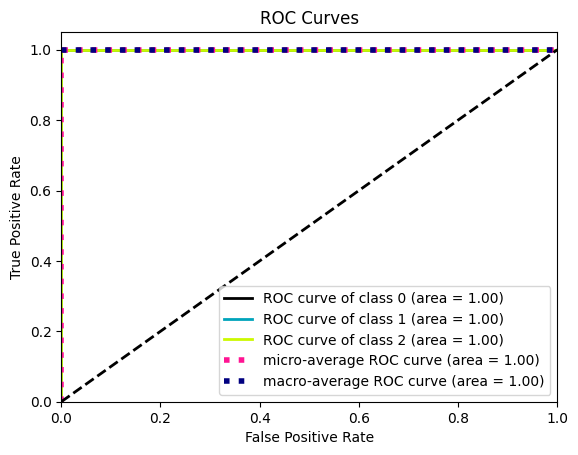

In [27]:
y_true = y_test
y_probs = cls_Diag.predict_proba(X_test)
skplt.metrics.plot_roc(y_true, y_probs)
plt.show()
# ROC Curve of 'Diagnosis'

In [28]:
y_probs

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

### 2. Classification: treatment

In [29]:
df_2 = df_onehot.copy()


y_2 = df_2['Treatment_y']
df_2.drop(['Diagnosis_y','Treatment_y','Success_rate_y'], axis = 1, inplace=True) # same as df_1
x_2 = df_2
x_2

,Age,Tgian_dieu_tri,Temporal Lobe Seizures,Extra-Limbic Involvement,Gender_F,Gender_M,EEG_Burst suppression pattern,"EEG_Burst-suppression pattern, multifocal epileptiform discharges",EEG_Extreme delta brush (EDB),EEG_Focal epileptiform discharges,...,CSF Pathogen_ND,CSF Pathogen_S. epidermidis,CSF Pathogen_Saccharomyces,CSF Pathogen_TB,Cham_phat_trien_Cognitive,Cham_phat_trien_Language and Motor,Cham_phat_trien_Motor,Cham_phat_trien_Motor and Social,Cham_phat_trien_N/A,Cham_phat_trien_Unknown
0,8,11,True,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,12,15,True,True,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,7,12,True,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,10,15,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,12,14,True,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2,0,True,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
161,0,0,True,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
162,0,0,True,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
163,1,0,True,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [31]:
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2, test_size = 0.25, random_state=8)

cls_Treatment = DecisionTreeClassifier()
cls_Treatment.fit(X_train,y_train)

preds_1 = cls_Treatment.predict(X_test)
print(accuracy_score(y_test,preds_1))
print(f1_score(y_test,preds_1, average = 'micro'))

0.9523809523809523
0.9523809523809523


In [32]:
len(preds_1)

42

In [33]:
confusion_matrix(y_test, preds_1)

array([[20,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 16]])

In [35]:
# filename = 'models/cls_treatment.pkl'
# pickle.dump(cls_Treatment, open(filename, 'wb'))

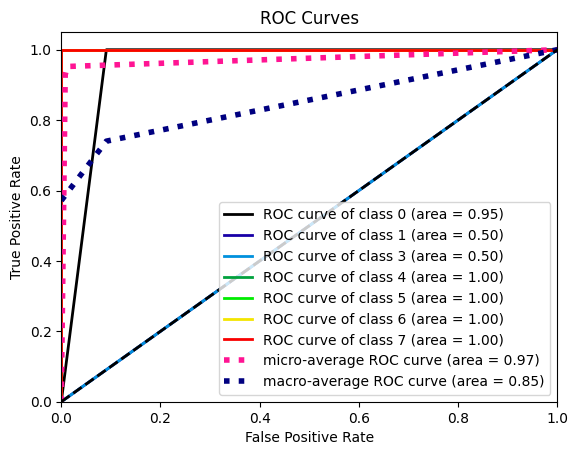

In [36]:
y_true = y_test
y_probs = cls_Treatment.predict_proba(X_test)
skplt.metrics.plot_roc(y_true, y_probs)
plt.show()
# ROC curve of 'Treatment'

### 3. Regression: success_rate

In [37]:
df_3 = df_onehot.copy()
y_3 = df_3['Success_rate_y']
df_3.drop('Success_rate_y', axis=1, inplace=True)
x_3 = df_3
x_3

,Age,Tgian_dieu_tri,Temporal Lobe Seizures,Extra-Limbic Involvement,Diagnosis_y,Treatment_y,Gender_F,Gender_M,EEG_Burst suppression pattern,"EEG_Burst-suppression pattern, multifocal epileptiform discharges",...,CSF Pathogen_ND,CSF Pathogen_S. epidermidis,CSF Pathogen_Saccharomyces,CSF Pathogen_TB,Cham_phat_trien_Cognitive,Cham_phat_trien_Language and Motor,Cham_phat_trien_Motor,Cham_phat_trien_Motor and Social,Cham_phat_trien_N/A,Cham_phat_trien_Unknown
0,8,11,True,False,0,0,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,12,15,True,True,0,1,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2,7,12,True,False,0,2,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,10,15,False,True,0,3,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,12,14,True,False,0,0,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2,0,True,False,2,7,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
161,0,0,True,False,2,7,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
162,0,0,True,False,2,7,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
163,1,0,True,False,2,7,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_3, y_3, test_size = 0.25, random_state=8)

reg_SuccessRate = SGDRegressor()
reg_SuccessRate.fit(X_train, y_train)   

SGDRegressor()

In [39]:
preds = reg_SuccessRate.predict(X_test)


print(mean_squared_error(y_test,preds))

0.9397234290730315


In [41]:
# filename = 'models/reg_success_rate.pkl'
# pickle.dump(reg_SuccessRate, open(filename, 'wb'))

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
# function to be re-used in 2 first models
def plot_ROC_multiclass_cls(n_classes, y_pred, y_test):
    y_score = y_pred
    # Plot linewidth.
    lw = 2

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(1)
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiclass-Classification')
    plt.legend(loc="lower right")
    plt.show()

### 4. Neural Network 1
Predict `Diagnosis` value


In [44]:
df_1 = df_onehot.copy()

y_1 = df_1['Diagnosis_y']
df_1.drop(['Diagnosis_y','Treatment_y','Success_rate_y'], axis = 1, inplace=True)
x_1 = df_1
# x_1.head()

In [45]:
y_1 = to_categorical(y_1)
# y_1[:5]


In [46]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size = 0.25, random_state = 8)
scaler_1 = StandardScaler()
X_train = scaler_1.fit_transform(X_train)
X_test = scaler_1.transform(X_test)

In [47]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [48]:
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((123, 110), (123, 3), (42, 110), (42, 3))

In [49]:
nn_cls_Diag = Sequential()

# First hidden layer
nn_cls_Diag.add(Dense(units=80,  kernel_initializer = 'uniform', activation='relu', input_dim=X_train.shape[1])) #110 input features

nn_cls_Diag.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))
nn_cls_Diag.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu'))
nn_cls_Diag.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Output layer
nn_cls_Diag.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'softmax'))

nn_cls_Diag.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

2023-10-13 19:56:41.063765: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-13 19:56:41.116713: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [50]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

nn_cls_Diag.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.1, callbacks=[early_stopping])
print('Training Done.')

Training Done.


In [51]:
visualizer(nn_cls_Diag, file_name = 'assets/nn_1', file_format='png') #  create the png image

Visualisation of the Neural Network #1

<div align="center">
    <img src='assets/nn_1.png' alt="NN 1" style="width:'60%';"/>
<div/>


In [52]:

loss, acc = nn_cls_Diag.evaluate(X_train, y_train)
print('Train loss:', loss)
print('Train accuracy:', acc)

print("\n***\n")
loss, acc = nn_cls_Diag.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', acc)


4/4 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000
Train loss: 0.00567944860085845
Train accuracy: 1.0

***

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000
Test loss: 0.003408091841265559
Test accuracy: 1.0


2/2 [==============================] - 0s 2ms/step

Class mapping for Diagnosis:
   0: Viem_nao_tu_mien_AE
   1: Viem_nao_nhiem_trung_IE
   2: Dong_kinh_va_benh_nao_phat_trien_DEE


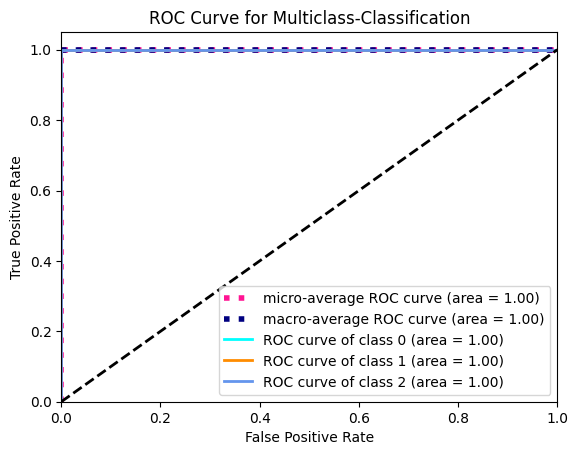

In [53]:
y_pred = nn_cls_Diag.predict(X_test)

print('\nClass mapping for Diagnosis:')
for idx, value in enumerate(diagnosis_values):
    print(f"   {idx}: {value}")

plot_ROC_multiclass_cls(n_classes=3, y_pred=y_pred, y_test=y_test)

### 5. Neural Network 2
Predict `Treatment` value


In [54]:
df_2 = df_onehot.copy()

y_2 = df_2['Treatment_y']
df_2.drop(['Diagnosis_y','Treatment_y','Success_rate_y'], axis = 1, inplace=True)
x_2 = df_2

In [55]:
# COunt values in the `Treatment` column
unique_values, counts = np.unique(y_2, return_counts=True)
unique_values, counts

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([77,  3,  1,  1,  5, 14, 12, 52]))

<Axes: >

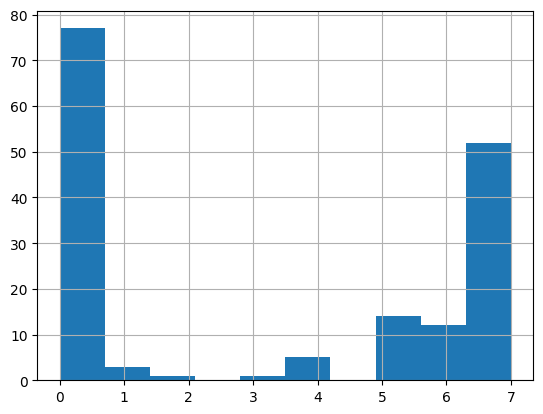

In [56]:
y_2.hist()

We can see that the `Treament` column (i.e. `y_2`) has classes that are heavily imbalanced. Specifically, class y=2 and y=3 has only 1 case for each. That will affect the model's performance.

I tried over-sampling, which try to duplicate the minor classes, but it could not help with the 1-case class. 

If we want to improve this model's performance on class y=2 and y=3, we should have more data on these cases.

In [57]:
y_2 = to_categorical(y_2)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2, test_size = 0.25, random_state = 8)
scaler_1 = StandardScaler()
X_train = scaler_1.fit_transform(X_train)
X_test = scaler_1.transform(X_test)

In [59]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [60]:
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((123, 110), (123, 8), (42, 110), (42, 8))

In [61]:
nn_cls_Treatment = Sequential()

# First hidden layer
nn_cls_Treatment.add(Dense(units=80,  kernel_initializer = 'uniform', activation='relu', input_dim=X_train.shape[1])) #110 input features

nn_cls_Treatment.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))
nn_cls_Treatment.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu'))
nn_cls_Treatment.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
nn_cls_Treatment.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Output layer
nn_cls_Treatment.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'softmax'))


nn_cls_Treatment.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

nn_cls_Treatment.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.05, callbacks=[early_stopping])
print('Training Done.')

Training Done.


In [63]:
visualizer(nn_cls_Treatment, file_name = 'assets/nn_2', file_format='png')

Visualisation of the Neural Network #2

<div align="center">
    <img src='assets/nn_2.png' alt="NN 2" style="width:'60%';"/>
<div/>


In [64]:

loss, acc = nn_cls_Treatment.evaluate(X_train, y_train)
print('Train loss:', loss)
print('Train accuracy:', acc)

print("\n***\n")
loss, acc = nn_cls_Treatment.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', acc)


4/4 [==============================] - 0s 2ms/step - loss: 0.8419 - accuracy: 0.7561


Train loss: 0.8419287800788879
Train accuracy: 0.7560975551605225

***

2/2 [==============================] - 0s 3ms/step - loss: 0.8704 - accuracy: 0.8571
Test loss: 0.8704047203063965
Test accuracy: 0.8571428656578064


2/2 [==============================] - 0s 3ms/step

Class mapping for Treatment:
   0: IV immunoglobulin, corticosteroids, plasmapheresis
   1: Anti-epileptic drugs (AEDs), immunomodulatory therapy
   2: AEDs
   3: IV immunoglobulin, corticosteroids
   4: Antiviral medication
   5: Supportive care
   6: Antibiotics
   7: N/A


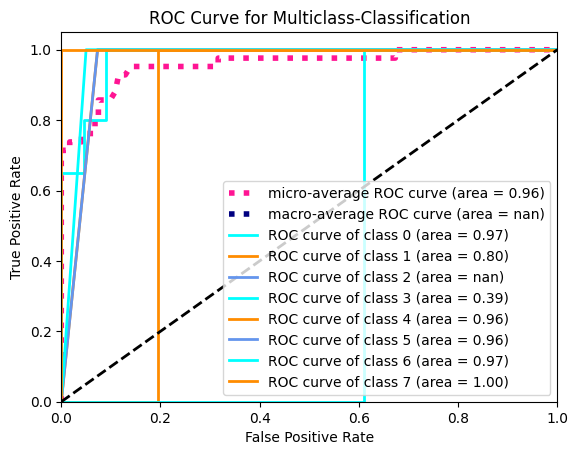

In [65]:
y_pred = nn_cls_Treatment.predict(X_test)
print('\nClass mapping for Treatment:')
for idx, value in enumerate(treatment_values):
    print(f"   {idx}: {value}")
plot_ROC_multiclass_cls(n_classes=8, y_pred=y_pred, y_test=y_test)

In [66]:
unique_values, counts = np.unique(y_test, return_counts=True)
unique_values, counts

(array([0., 1.], dtype=float32), array([294,  42]))

### 6. Neural Network 3
Predict `Success_rate` value

In [67]:
df_3 = df_onehot.copy()

y_3 = df_3['Success_rate_y']
df_3.drop(['Success_rate_y'], axis = 1, inplace=True)
x_3 = df_3

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x_3, y_3, test_size = 0.25, random_state = 8)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [70]:
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((123, 112), (123,), (42, 112), (42,))

In [71]:
nn_reg_Success_rate = Sequential()

# First hidden layer
nn_reg_Success_rate.add(Dense(units=80, activation='relu', input_dim=X_train.shape[1])) #112 input features

nn_reg_Success_rate.add(Dense(units = 60, activation = 'relu'))
nn_reg_Success_rate.add(Dense(units = 30,  activation = 'relu'))
nn_reg_Success_rate.add(Dense(units = 20, activation = 'relu'))
nn_reg_Success_rate.add(Dense(units = 10,  activation = 'relu'))

# Output layer
nn_reg_Success_rate.add(Dense(units = 1, kernel_initializer = 'uniform'))


nn_reg_Success_rate.compile(optimizer = 'adam', loss='mean_squared_error', metrics=['mse'])

In [72]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

nn_reg_Success_rate.fit(X_train, y_train, epochs=200, verbose=0, validation_split=0.05, callbacks=[early_stopping])
print('Training Done.')

Training Done.


In [73]:
visualizer(nn_reg_Success_rate, file_name = 'assets/nn_3', file_format='png')

Visualisation of the Neural Network #3
<div align="center">
    <img src='assets/nn_3.png' alt="NN 3" style="width:'60%';"/>
<div/>


In [74]:
y_pred = nn_reg_Success_rate.predict(X_test)
print('\nMSE of the prediction (the closer to 0 the better): ', mean_squared_error(y_test, y_pred))


2/2 [==============================] - 0s 3ms/step

MSE of the prediction (the closer to 0 the better):  0.8012813


**Compare between true value & predicted value:**
We can see that quite a number of the predicted values are pretty close to the true value.

In [75]:
result_comparison = pd.DataFrame({'Success_rate_true': list(y_test), 'Success_rate_predicted': list(np.ravel(y_pred))}, columns=['Success_rate_true', 'Success_rate_predicted'])
result_comparison

,Success_rate_true,Success_rate_predicted
0,1.0,2.047279
1,2.0,1.912042
2,1.0,1.146656
3,3.0,2.464454
4,4.0,2.045344
5,2.0,1.906147
6,4.0,2.122428
7,2.0,3.016587
8,4.0,2.171296
9,2.0,1.875834
